<a href="https://colab.research.google.com/github/Ragendu7306/voice-assistant/blob/main/CREDIT_CARD_FRAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/fraudTest.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27230,27230,2020-06-30 08:20:10,180036456789979,"fraud_Streich, Hansen and Veum",gas_transport,73.12,Mackenzie,Salazar,F,982 Melissa Lock,...,42.9207,-91.0685,878.0,Risk analyst,1974-11-20,6f76444c6cc287ddb3407a485901e6bc,1.372580e+09,43.410199,-90.119977,0.0
27231,27231,2020-06-30 08:21:34,4707867759656333,fraud_Towne LLC,misc_pos,3.69,Susan,Shah,F,9016 Jordan Bypass Apt. 516,...,36.7558,-83.1838,581.0,"Psychologist, counselling",1967-02-04,6cba43ce85d06216328e01b37d97fb94,1.372580e+09,36.418842,-83.067039,0.0
27232,27232,2020-06-30 08:21:57,6526955903501879,fraud_Padberg-Welch,grocery_pos,84.05,Jennifer,Scott,F,7351 Cindy Well Suite 099,...,26.3304,-81.5871,276002.0,Medical technical officer,1950-12-14,31c792b9d6f21dc88147d7a7c7e0434f,1.372581e+09,25.873441,-81.589103,0.0
27233,27233,2020-06-30 08:22:09,5152054598359927,"fraud_Mosciski, Gislason and Mertz",grocery_pos,74.56,Jim,Johnson,M,868 Brady Mill Apt. 837,...,29.8872,-90.0331,55581.0,Biomedical scientist,1972-09-12,c71fb27609c52cc9147a98dce6b11806,1.372581e+09,30.430342,-90.735797,0.0


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [ ]:
#  Drop useless column ---
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:


#Separate features (X) and target (y) BEFORE dropping is_fraud ---
y = df['is_fraud']           # <-- Save target first
X = df.drop(['is_fraud'], axis=1)  # <-- Then drop from features

In [ ]:
df['city_pop'] = df['city_pop'].fillna(df['city_pop'].mode()[0])
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['dob'] = df['dob'].fillna(df['dob'].mode()[0])
df['trans_num'] = df['trans_num'].fillna(df['trans_num'].mode()[0])
df['unix_time'] = df['unix_time'].fillna(df['unix_time'].mode()[0])
df['merch_lat'] = df['merch_lat'].fillna(df['merch_lat'].mode()[0])
df['merch_long'] = df['merch_long'].fillna(df['merch_long'].mode()[0])


In [ ]:
# Step 2: split & detect feature types


numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(cat_cols))


Numeric columns: 9
Categorical columns: 12


In [ ]:
# --- Fix NaN values in target ---
df = df.dropna(subset=['is_fraud'])
y = df['is_fraud'].astype(int)
X = df.drop(['is_fraud'], axis=1)


In [ ]:
#  Always make an explicit copy first
df = df.copy()

# Fill missing city_pop values
df.loc[:, 'city_pop'] = df['city_pop'].fillna(df['city_pop'].mode()[0])

# Convert 'trans_date_trans_time' to datetime
df.loc[:, 'trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

#  Drop rows where conversion failed
df = df.dropna(subset=['trans_date_trans_time'])

#  Extract time-based features
df.loc[:, 'hour'] = df['trans_date_trans_time'].dt.hour
df.loc[:, 'day'] = df['trans_date_trans_time'].dt.day
df.loc[:, 'weekday'] = df['trans_date_trans_time'].dt.dayofweek


In [ ]:
print(df.columns.tolist())


['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'weekday']


In [ ]:
#  Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])


In [ ]:
X = X.fillna(0)

In [ ]:
print("Missing in X:", X.isna().sum().sum())
print("Missing in y:", y.isna().sum())


Missing in X: 0
Missing in y: 0


In [ ]:
#  Scale numeric data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [ ]:
X_train.shape,y_train.shape

((21787, 21), (21787,))

In [ ]:
X_test.shape,y_test.shape

((5447, 21), (5447,))

In [ ]:
# Apply SMOTE (only on training data)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
#rf.fit(X_train, y_train)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_rf)*100)

99.83477143381678


In [ ]:
#Get predicted probabilities for fraud (class 1)
y_proba = rf.predict_proba(X_test)[:, 1]


In [ ]:
#Try a custom threshold (e.g., 0.3)
import numpy as np
threshold = 0.3
y_pred_custom = np.where(y_proba >= threshold, 1, 0)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
# print("Precision:",precision_score(y_test,y_pred_rf))
# print("Recall:",recall_score(y_test,y_pred_rf))
# print("F1 score:",f1_score(y_test,y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1 score:", f1_score(y_test, y_pred_custom))



Precision: 0.7352941176470589
Recall: 0.9615384615384616
F1 score: 0.8333333333333334


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5421
           1       0.87      0.77      0.82        26

    accuracy                           1.00      5447
   macro avg       0.93      0.88      0.91      5447
weighted avg       1.00      1.00      1.00      5447



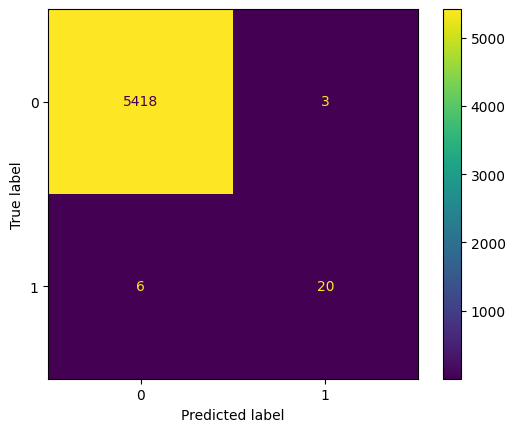

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

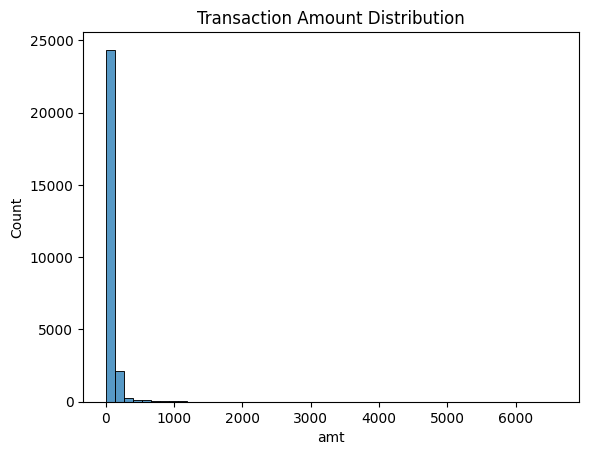

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['amt'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()


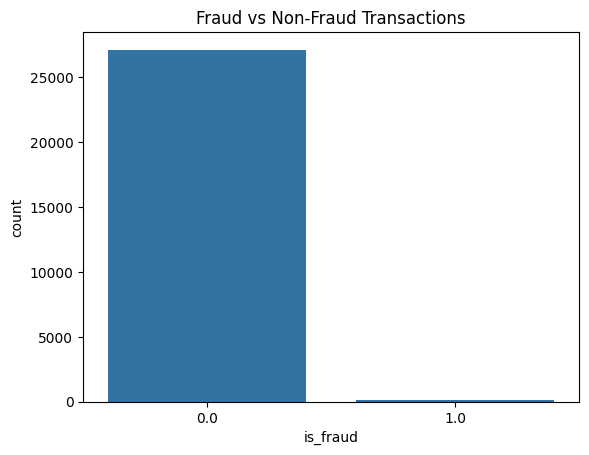

In [ ]:
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


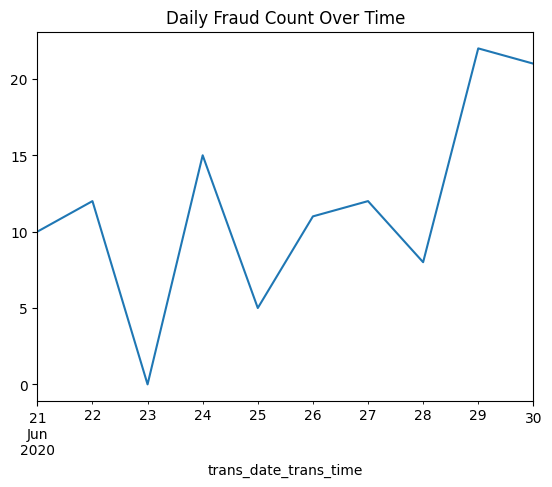

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.set_index('trans_date_trans_time')['is_fraud'].resample('D').sum().plot()
plt.title('Daily Fraud Count Over Time')
plt.show()


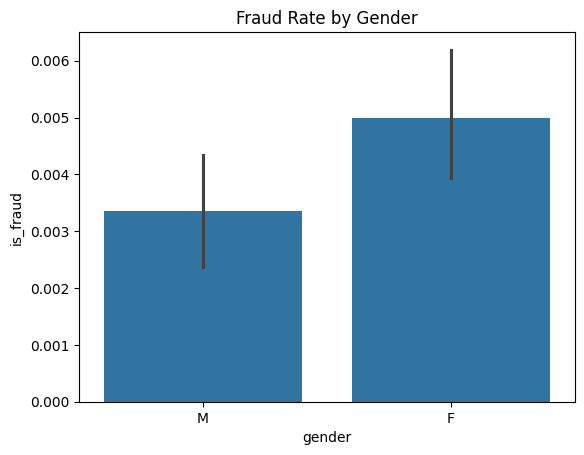

In [ ]:
sns.barplot(x='gender', y='is_fraud', data=df)
plt.title('Fraud Rate by Gender')
plt.show()


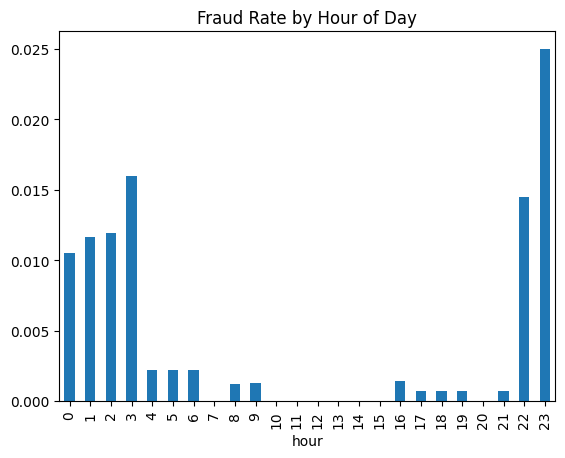

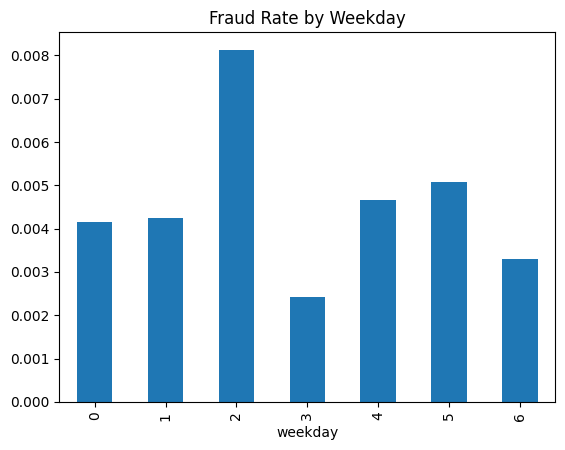

In [ ]:
import matplotlib.pyplot as plt

# Fraud frequency by hour
df.groupby('hour')['is_fraud'].mean().plot(kind='bar')
plt.title('Fraud Rate by Hour of Day')
plt.show()

# Fraud frequency by weekday
df.groupby('weekday')['is_fraud'].mean().plot(kind='bar')
plt.title('Fraud Rate by Weekday')
plt.show()


In [ ]:
import pickle
pickle.dump(rf, open("model_fraud.sav", "wb"))


In [ ]:
pickle.dump(scaler, open("scaler_fraud.sav", "wb"))
